In [4]:
%load_ext autoreload
%autoreload 2 
import pandas as pd
import numpy as np
import requests 
import matplotlib.pyplot as plt
import json

In [5]:
from data_compilation import call_all_symbols
from data_cleaning import full_clean

In [6]:
symbol_list = ['SLV', 'SIL', 'GLD', 'GDX', 'DJI']

In [7]:
df = call_all_symbols(symbol_list)

The response code for SLV is 200
The response code for SIL is 200
The response code for GLD is 200
The response code for GDX is 200
The response code for DJI is 200


In [8]:
from data_cleaning import full_clean

In [9]:
#Cleaning data
df_clean = full_clean()

//anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


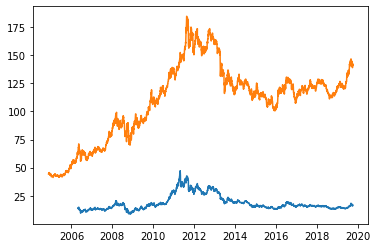

In [10]:
df_clean_SLV = df_clean.loc[df_clean['symbol'] == 'SLV']
df_clean_GLD = df_clean.loc[df_clean['symbol'] == 'GLD']
plt.plot(df_clean_SLV['date'], df_clean_SLV['close'])
plt.plot(df_clean_GLD['date'], df_clean_GLD['close']);

In [11]:
df_clean['daily_movement'] = (df_clean.open-df_clean.close)/df_clean.open
df_clean['daily_Rn'] = df_clean['close']-df_clean['close'].shift(1)
df_clean = df_clean.fillna(value=0)
df_clean.head(20)

,date,open,high,low,close,volume,symbol,daily_movement,daily_Rn
0,2019-10-08,16.60,16.66,16.49,16.61,19326217.0,SLV,-0.000602,0.00
1,2019-10-07,16.38,16.46,16.28,16.30,8359926.0,SLV,0.004884,-0.31
2,2019-10-04,16.30,16.46,16.25,16.41,17200800.0,SLV,-0.006748,0.11
3,2019-10-03,16.38,16.65,16.37,16.43,24412700.0,SLV,-0.003053,0.02
4,2019-10-02,16.33,16.54,16.27,16.43,21300800.0,SLV,-0.006124,0.00
5,2019-10-01,15.96,16.21,15.91,16.15,23278100.0,SLV,-0.011905,-0.28
6,2019-09-30,16.03,16.10,15.83,15.92,29218300.0,SLV,0.006862,-0.23
7,2019-09-27,16.26,16.49,16.19,16.36,25234800.0,SLV,-0.006150,0.44
8,2019-09-26,16.76,16.89,16.63,16.67,20319100.0,SLV,0.005370,0.31
9,2019-09-25,17.29,17.35,16.67,16.71,29406000.0,SLV,0.033545,0.04


In [222]:
df_clean_SLV = df_clean.loc[df_clean['symbol'] == 'SLV'][['date','symbol','open','close','daily_movement','daily_Rn']]
df_clean_GLD = df_clean.loc[df_clean['symbol'] == 'GLD'][['date','symbol','open','close','daily_movement','daily_Rn']]
df_clean_SLV.date.isin(df_clean_GLD.date).value_counts()

True    3384
Name: date, dtype: int64

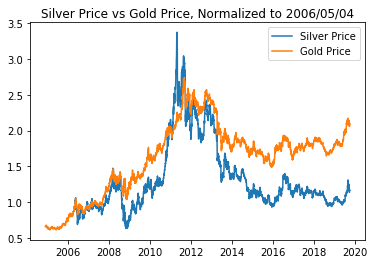

In [223]:
df_clean_SLV['scale'] = df_clean_SLV['close']/df_clean_SLV.iloc[3379]['close']
df_clean_GLD['scale'] = df_clean_GLD['close']/df_clean_GLD.iloc[3379]['close']

plt.plot(df_clean_SLV['date'], df_clean_SLV['scale'],label='Silver Price')
plt.plot(df_clean_GLD['date'], df_clean_GLD['scale'],label='Gold Price')
plt.title("Silver Price vs Gold Price, Normalized to 2006/05/04")
plt.legend();

In [224]:
df_slv_vs_gld = pd.merge(df_clean_SLV,
                         df_clean_GLD,
                         how='left',
                         on='date',
                         suffixes=('_SLV', '_GLD'))
df_slv_vs_gld['delta'] = df_slv_vs_gld['daily_movement_SLV']-df_slv_vs_gld['daily_movement_GLD']
df_slv_vs_gld['delta_Rn'] = df_slv_vs_gld['daily_Rn_SLV']-df_slv_vs_gld['daily_Rn_GLD']
print(df_slv_vs_gld.shape)




(3384, 15)


In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

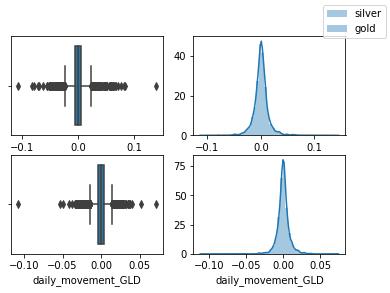

In [216]:
fig,ax = plt.subplots(2,2)

sns.boxplot(df_slv_vs_gld['daily_movement_SLV'],ax=ax[0,0])
sns.distplot(df_slv_vs_gld['daily_movement_SLV'],ax=ax[0,1],label='silver')
sns.boxplot(df_slv_vs_gld['daily_movement_GLD'],ax=ax[1,0])
sns.distplot(df_slv_vs_gld['daily_movement_GLD'],ax=ax[1,1],label='gold')
fig.legend();

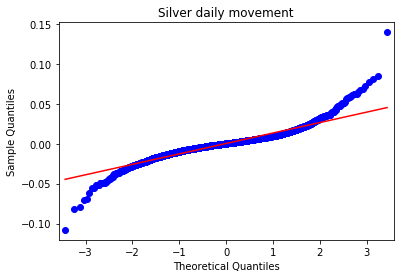

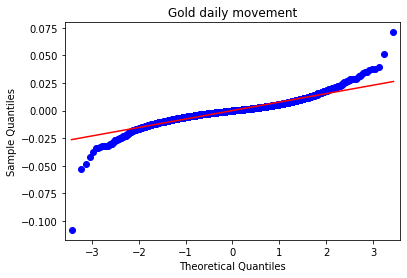

In [217]:
import statsmodels.api as sm
# fig,ax = plt.subplots(2,1)
ax[0] = sm.qqplot(df_slv_vs_gld['daily_movement_SLV'], line = 'r')
plt.title('Silver daily movement')

ax[1] = sm.qqplot(df_slv_vs_gld['daily_movement_GLD'], line = 'r')
plt.title('Gold daily movement')

plt.show()

In [234]:
data = df_slv_vs_gld[(np.abs(stats.zscore(df_slv_vs_gld[['daily_Rn_SLV','daily_Rn_GLD','daily_movement_SLV','daily_movement_GLD','delta','delta_Rn']])) < 3).all(axis=1)]
data.head()

,date,symbol_SLV,open_SLV,close_SLV,daily_movement_SLV,daily_Rn_SLV,scale_SLV,symbol_GLD,open_GLD,close_GLD,daily_movement_GLD,daily_Rn_GLD,scale_GLD,delta,delta_Rn
1,2019-10-04,SLV,16.30,16.41,-0.006748,0.006726,1.172143,GLD,141.48,141.90,-0.002969,0.008564,2.102845,-0.003780,-0.001838
2,2019-10-03,SLV,16.38,16.43,-0.003053,0.001218,1.173571,GLD,141.36,141.90,-0.003820,0.000000,2.102845,0.000768,0.001218
3,2019-10-02,SLV,16.33,16.43,-0.006124,0.000000,1.173571,GLD,140.79,141.26,-0.003338,-0.004520,2.093361,-0.002785,0.004520
4,2019-10-01,SLV,15.96,16.15,-0.011905,-0.017189,1.153571,GLD,138.07,139.63,-0.011299,-0.011606,2.069206,-0.000606,-0.005583
5,2019-09-30,SLV,16.03,15.92,0.006862,-0.014344,1.137143,GLD,139.77,138.87,0.006439,-0.005458,2.057943,0.000423,-0.008886


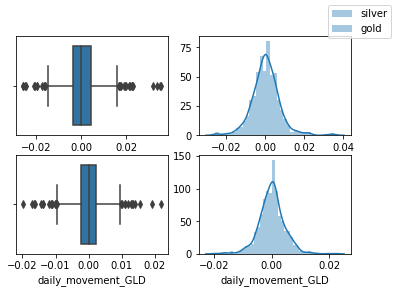

In [205]:
fig,ax = plt.subplots(2,2)

sns.boxplot(data['daily_movement_SLV'],ax=ax[0,0])
sns.distplot(data['daily_movement_SLV'],ax=ax[0,1],label='silver')
sns.boxplot(data['daily_movement_GLD'],ax=ax[1,0])
sns.distplot(data['daily_movement_GLD'][:750],ax=ax[1,1],label='gold')
fig.legend();

In [206]:
import scipy.stats as stats
t,p = stats.ttest_rel(data['daily_movement_GLD'][:750],data['daily_movement_SLV'][:750])
t,p

(-1.6528793981223417, 0.09877447768925207)

In [207]:
import scipy.stats as stats
t,p = stats.ttest_rel(data['daily_Rn_GLD'][:750],data['daily_Rn_SLV'][:750])
t,p

(-0.5910082371544634, 0.5546932019769484)

## Looking at weekly volatility

In [220]:
df_clean_GLD.head()

,date,symbol,close,daily_movement,daily_Rn,scale
5768,2019-10-07,GLD,140.69,0.003330,2.255994,2.084914
5769,2019-10-04,GLD,141.90,-0.002969,0.008564,2.102845
5770,2019-10-03,GLD,141.90,-0.003820,0.000000,2.102845
5771,2019-10-02,GLD,141.26,-0.003338,-0.004520,2.093361
5772,2019-10-01,GLD,139.63,-0.011299,-0.011606,2.069206


In [248]:
gld_weekly = df_clean_GLD.groupby(['symbol',pd.Grouper(key='date',freq='W')]).mean().reset_index().sort_values('date',ascending=False)[['date','open','close']]
slv_weekly = df_clean_SLV.groupby(['symbol',pd.Grouper(key='date',freq='W')]).mean().reset_index().sort_values('date',ascending=False)[['date','open','close']]

gld_weekly['wk_movement'] = (gld_weekly.open-gld_weekly.close)/gld_weekly.open
slv_weekly['wk_movement'] = (slv_weekly.open-slv_weekly.close)/slv_weekly.open

gld_weekly['wk_Rn'] = np.log(gld_weekly['close']/gld_weekly['close'].shift(1))
slv_weekly['wk_Rn'] = np.log(slv_weekly['close']/slv_weekly['close'].shift(1))
gld_weekly = gld_weekly.fillna(value=0)
slv_weekly = slv_weekly.fillna(value=0)

df_slv_vs_gld_wk = pd.merge(slv_weekly,
                            gld_weekly,
                            how='left',
                            on='date',
                            suffixes=('_SLV', '_GLD'))

df_slv_vs_gld_wk = df_slv_vs_gld_wk[(np.abs(stats.zscore(df_slv_vs_gld_wk[['wk_Rn_SLV','wk_Rn_GLD','wk_movement_SLV','wk_movement_GLD']])) < 3).all(axis=1)]
data.head()

df_slv_vs_gld_wk = df_slv_vs_gld_wk.loc[df_slv_vs_gld_wk.date>'2014-10-06']
print(df_slv_vs_gld_wk.shape)
df_slv_vs_gld_wk.tail()


(261, 9)


,date,open_SLV,close_SLV,wk_movement_SLV,wk_Rn_SLV,open_GLD,close_GLD,wk_movement_GLD,wk_Rn_GLD
257,2014-11-09,15.01200,15.084,-0.004796,-0.003177,111.026,111.402,-0.003387,-0.005604
258,2014-11-02,16.16124,16.122,0.002428,0.066550,116.388,116.084,0.002612,0.041169
259,2014-10-26,16.62784,16.600,0.001674,0.029218,119.394,119.206,0.001575,0.026539
260,2014-10-19,16.67012,16.674,-0.000233,0.004448,118.806,118.862,-0.000471,-0.002890
261,2014-10-12,16.59600,16.604,-0.000482,-0.004207,116.812,117.018,-0.001764,-0.015635


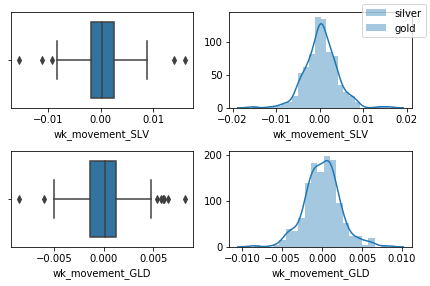

In [249]:
fig,row = plt.subplots(2,1, tight_layout=True)

sns.boxplot(df_slv_vs_gld_wk['wk_movement_SLV'],ax=ax[0,0])
sns.distplot(df_slv_vs_gld_wk['wk_movement_SLV'],ax=ax[0,1],label='silver')
sns.boxplot(df_slv_vs_gld_wk['wk_movement_GLD'],ax=ax[1,0])
sns.distplot(df_slv_vs_gld_wk['wk_movement_GLD'],ax=ax[1,1],label='gold')
fig.legend();

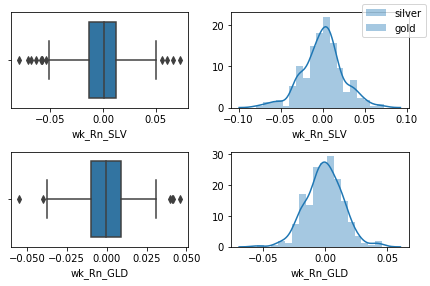

In [250]:
fig,ax = plt.subplots(2,2, tight_layout=True)

sns.boxplot(df_slv_vs_gld_wk['wk_Rn_SLV'],ax=ax[0,0])
sns.distplot(df_slv_vs_gld_wk['wk_Rn_SLV'],ax=ax[0,1],label='silver')
sns.boxplot(df_slv_vs_gld_wk['wk_Rn_GLD'],ax=ax[1,0])
sns.distplot(df_slv_vs_gld_wk['wk_Rn_GLD'],ax=ax[1,1],label='gold')
fig.legend();

In [252]:
t,p = stats.ttest_rel(df_slv_vs_gld_wk['wk_movement_SLV'],df_slv_vs_gld_wk['wk_movement_GLD'])
t,p

(2.4433028325928396, 0.01521925074267192)

In [254]:
t,p = stats.ttest_rel(df_slv_vs_gld_wk['wk_Rn_SLV'],df_slv_vs_gld_wk['wk_Rn_GLD'])
t,p

(0.654477091585105, 0.5133830003297393)

## Looking at monthly volatility

In [255]:
gld_monthly = df_clean_GLD.groupby(['symbol',pd.Grouper(key='date',freq='M')]).mean().reset_index().sort_values('date',ascending=False)[['date','open','close']]
slv_monthly = df_clean_SLV.groupby(['symbol',pd.Grouper(key='date',freq='M')]).mean().reset_index().sort_values('date',ascending=False)[['date','open','close']]

gld_monthly['mo_movement'] = (gld_monthly.open-gld_monthly.close)/gld_monthly.open
slv_monthly['mo_movement'] = (slv_monthly.open-slv_monthly.close)/slv_monthly.open

gld_monthly['mo_Rn'] = np.log(gld_monthly['close']/gld_monthly['close'].shift(1))
slv_monthly['mo_Rn'] = np.log(slv_monthly['close']/slv_monthly['close'].shift(1))
gld_monthly = gld_monthly.fillna(value=0)
slv_monthly = slv_monthly.fillna(value=0)

df_slv_vs_gld_mo = pd.merge(slv_monthly,
                            gld_monthly,
                            how='left',
                            on='date',
                            suffixes=('_SLV', '_GLD'))

df_slv_vs_gld_mo = df_slv_vs_gld_mo[(np.abs(stats.zscore(df_slv_vs_gld_mo[['mo_Rn_SLV','mo_Rn_GLD','mo_movement_SLV','mo_movement_GLD']])) < 3).all(axis=1)]

df_slv_vs_gld_mo = df_slv_vs_gld_mo.loc[df_slv_vs_gld_mo.date>'2014-10-06']
print(df_slv_vs_gld_mo.shape)
df_slv_vs_gld_mo.tail()


(61, 9)


,date,open_SLV,close_SLV,mo_movement_SLV,mo_Rn_SLV,open_GLD,close_GLD,mo_movement_GLD,mo_Rn_GLD
56,2015-02-28,16.086826,16.057368,0.001831,0.031903,117.954247,117.773684,0.001531,0.039910
57,2015-01-31,16.437505,16.461500,-0.001460,0.024856,120.128000,120.384500,-0.002135,0.021926
58,2014-12-31,15.612955,15.553636,0.003799,-0.056730,115.381364,115.193636,0.001627,-0.044076
59,2014-11-30,15.295258,15.340000,-0.002925,-0.013831,112.952316,113.049474,-0.000860,-0.018789
60,2014-10-31,16.490630,16.478696,0.000724,0.071605,117.636522,117.563913,0.000617,0.039157


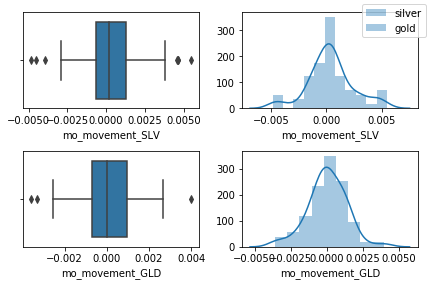

In [256]:
fig,ax = plt.subplots(2,2, tight_layout=True)

sns.boxplot(df_slv_vs_gld_mo['mo_movement_SLV'],ax=ax[0,0])
sns.distplot(df_slv_vs_gld_mo['mo_movement_SLV'],ax=ax[0,1],label='silver')
sns.boxplot(df_slv_vs_gld_mo['mo_movement_GLD'],ax=ax[1,0])
sns.distplot(df_slv_vs_gld_mo['mo_movement_GLD'],ax=ax[1,1],label='gold')
fig.legend();

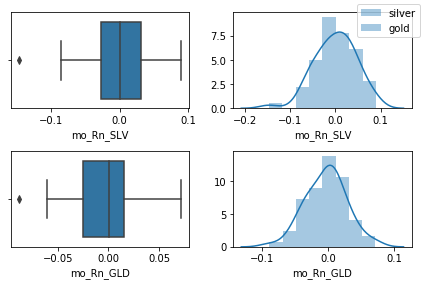

In [257]:
fig,ax = plt.subplots(2,2, tight_layout=True)

sns.boxplot(df_slv_vs_gld_mo['mo_Rn_SLV'],ax=ax[0,0])
sns.distplot(df_slv_vs_gld_mo['mo_Rn_SLV'],ax=ax[0,1],label='silver')
sns.boxplot(df_slv_vs_gld_mo['mo_Rn_GLD'],ax=ax[1,0])
sns.distplot(df_slv_vs_gld_mo['mo_Rn_GLD'],ax=ax[1,1],label='gold')
fig.legend();

In [258]:
t,p = stats.ttest_rel(df_slv_vs_gld_mo['mo_movement_SLV'],df_slv_vs_gld_mo['mo_movement_GLD'])
t,p

(2.291870814776643, 0.025437488662358173)

In [259]:
t,p = stats.ttest_rel(df_slv_vs_gld_mo['mo_Rn_SLV'],df_slv_vs_gld_mo['mo_Rn_GLD'])
t,p

(0.9403459936038002, 0.3508106317266598)

In [12]:
from statsmodels.stats.power import  tt_solve_power

In [ ]:
tt_solve_power(e)

In [13]:
from hypothesis_tests import hypothesis_test_three_prep

IndentationError: expected an indented block (hypothesis_tests.py, line 85)